#  This is assignment09


# Name:PENG CIYUAN 

#  Student ID:2018220161 

# Link:https://github.com/pcyyyy/assignment09.git

# Getting train data and test data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    



    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1
    


# Making Convolution Feature6*6 

In [2]:
def filt(matrix):
    kernel = np.array([[ -1, -1, -1, -1, -1,-1],[-1,  -1,  -1,  -1, -1,-1],[-1,  0,  9, 9,0, -1],[-1,  0,  9,  9, 0,-1],[-1, -1, -1, -1, -1,-1],[-1, -1, -1, -1, -1,-1]])
    matrix = signal.convolve2d(matrix, kernel, boundary='symm', mode='same')
    return matrix

# Randomly set r

In [3]:
r = np.random.normal(size=(1,1))

# Get matrix trainX,trainY,testX,testY

In [4]:
def vecY(Y):
    for i in range(0, len(Y)):
        if(int(Y[i]) == 0):
            Y[i] = 1 # label == 0, return 1
        else:
            Y[i] = -1 # label != 0, return -1
    return Y
def vecX(X):
    x = []
    for i in range(len(X)):
        x_ = X[i].reshape((size_row,size_col))
        x_ = filt(x_)
        x_ = np.ravel(x_, order='C')
        x.append(x_)
    return x


In [5]:
trainY = vecY(list_label_train)
testY = vecY(list_label_test)
trainX = vecX(list_image_train.T)
trainX = np.array(trainX)
testX = vecX(list_image_test.T)
testX = np.array(testX)


# Define feature function and get parameters A

In [6]:
def feature(X,r):
    F = []
    for i in range(len(X)):
        a = r .dot(X[i].reshape(1,784))
        F.append(a)
    F = np.array(F)
    return F
F = feature(trainX,r)
F = np.reshape(F,(60000,1*784))
testF = feature(testX,r)
testF = np.reshape(testF,(10000,1*784))

In [7]:
A1=np.linalg.inv((F.T).dot(F))
A2=(F.T).dot(trainY)
A=(A1).dot(A2)

In [8]:
Y = (testF).dot(A)

#  Binary Classiﬁcation:FN,FP,TN,TP 

In [9]:
FN = []; FP = []; TN = []; TP = []

for i in range(0, len(Y)):
        if(float(Y[i]) > 0):
            if(int(testY[i]) == 1):
                TP.append(testF[i])
            else:
                FP.append(testF[i])
        else:
            if(int(testY[i]) == 1):
                FN.append(testF[i])
            else:
                TN.append(testF[i])

# Compute the Accuracy 

In [10]:
accuracy = ((len(TN)+len(TP))/10000)*100
print("Accuracy: ",accuracy)


Accuracy:  49.58


# Plot the average image of TP, FP,TN,FN 

(-0.5, 27.5, 27.5, -0.5)

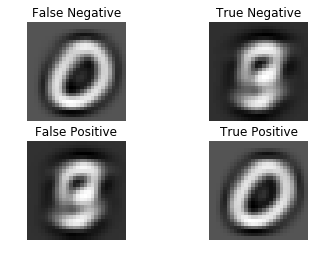

In [11]:
def computeMin(vec):
    vec = np.mat(vec)
    mean_ = np.mean(vec, axis=0)
    return mean_
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)


P1 = plt.subplot(2, 2, 1)
P1.set_title('False Negative')
im_average = computeMin(FN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P2 = plt.subplot(2, 2, 2)
P2.set_title('True Negative')
im_average = computeMin(TN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P3 = plt.subplot(2, 2, 3)
P3.set_title('False Positive')
im_average = computeMin(FP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P4 = plt.subplot(2, 2, 4)
P4.set_title('True Positive')
im_average = computeMin(TP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')